# 등산로 조성
등산로를 조성하려고 한다.

등산로를 만들기 위한 부지는 N * N 크기를 가지고 있으며, 이곳에 최대한 긴 등산로를 만들 계획이다.

등산로 부지는 아래과 같이 숫자가 표시된 지도로 주어지며, 각 숫자는 지형의 높이를 나타낸다.
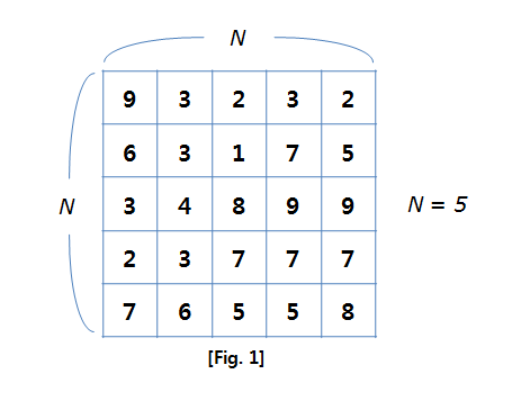
 

 

등산로를 만드는 규칙은 다음과 같다.

   ① 등산로는 가장 높은 봉우리에서 시작해야 한다.

   ② 등산로는 산으로 올라갈 수 있도록 반드시 높은 지형에서 낮은 지형으로 가로 또는 세로 방향으로 연결이 되어야 한다.
       즉, 높이가 같은 곳 혹은 낮은 지형이나, 대각선 방향의 연결은 불가능하다.

   ③ 긴 등산로를 만들기 위해 딱 한 곳을 정해서 최대 K 깊이만큼 지형을 깎는 공사를 할 수 있다.

N * N 크기의 지도가 주어지고, 최대 공사 가능 깊이 K가 주어진다.

이때 만들 수 있는 가장 긴 등산로를 찾아 그 길이를 출력하는 프로그램을 작성하라.

출처: https://swexpertacademy.com/main/code/problem/problemDetail.do?contestProbId=AV5PoOKKAPIDFAUq&categoryId=AV5PoOKKAPIDFAUq&categoryType=CODE

In [ ]:
def checkMax():
    global maxcoord
    maxVal=0
    for i in range(N):
        for j in range(N):
            if board[i][j]>maxVal:
                maxVal=board[i][j]
    for i in range(N):
        for j in range(N):
            if board[i][j] == maxVal:
                maxCoord.append((i, j))
                
def dfs(y, x, kVal, len, newVal):
    global maxlen, visited
    if maxlen<len:
        maxlen=len
    visited[y][x]=True
    for dy, dx in (-1, 0), (1, 0), (0, -1), (0, 1):
        ny , nx = y +dy, x+ dx
        if 0> ny or ny>=N or 0>nx or nx>=N:
            continue
        else:
            #범위 이상 없는 곳
            if board[ny][nx]<newVal and visited[ny][nx]==False:
                dfs(ny, nx, kVal, len+1, board[ny][nx])
            else:
                if kVal>0:
                    for i in range(1, K+1):
                        temp=board[ny][nx]-i
                        if temp <newVal and visited[ny][nx]==False:
                            dfs(ny, nx, kVal-1, len+1, temp)
    visited[y][x]=False
    
T = int(input())
# 여러개의 테스트 케이스가 주어지므로, 각각을 처리합니다.
for test_case in range(1, T + 1):
    N, K = map(int, input().split())
    board = [list( map( int, input().split())) for _ in range(N)]
    maxCoord=[]
    checkMax()
    maxlen=1
    visited=[[False]*N for _ in range(N)]
    for coord in maxCoord:
        dfs(coord[0], coord[1], 1, 1, board[coord[0]][coord[1]])
        